# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, LabelEncoder

## Read Files

In [2]:
data_path = 'Data/telecom_customer_churn.csv'
zipcodes_path = 'Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'

In [3]:
dataset = pd.read_csv(data_path)
zipcodes_df = pd.read_csv(zipcodes_path)

## Dataset Overview

In [4]:
print(dataset.dtypes)

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [5]:
print(dataset.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [6]:
print(dataset.head())

  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

In [7]:
dataset.isna().sum()


Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
dataset.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

In [9]:
print(dataset.duplicated().sum())

0


In [10]:
dataset['Customer Status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [11]:
dataset = dataset.drop(['Customer ID','City','Latitude','Longitude','Churn Category','Churn Reason'],axis=1)

In [12]:
dataset.describe()

,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [13]:
dataset.shape

(7043, 32)

## Data Preprocessing

In [14]:
zipcodes_df = zipcodes_df[['RegionName','2024-07-31']]


In [15]:
zipcodes_df.rename(columns={'RegionName': 'zip_code','2024-07-31':'home_value'}, inplace=True)

In [16]:
def map_zipcodes_to_homevalues(main_df, zipcode_df):
    zipcode_dict = zipcode_df.set_index('zip_code')['home_value'].to_dict()
    main_df['home_value'] = main_df['Zip Code'].map(zipcode_dict)
    return main_df

In [17]:
dataset = map_zipcodes_to_homevalues(dataset,zipcodes_df)

In [18]:
dataset = dataset.drop(['Zip Code'],axis = 1)

In [19]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,6.000000e+01,8.000000e+01
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000e+00,9.000000e+00
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000e+00,1.100000e+01
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,5.500000e+01,7.200000e+01
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,3.768000e+01,4.999000e+01
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,3.000000e+01,8.500000e+01
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,8.975000e+01,1.187500e+02
Total Charges,7043.0,2280.381264,2266.220462,18.800000,400.150000,1394.550000,3.786600e+03,8.684800e+03
Total Refunds,7043.0,1.962182,7.902614,0.000000,0.000000,0.000000,0.000000e+00,4.979000e+01
Total Extra Data Charges,7043.0,6.860713,25.104978,0.000000,0.000000,0.000000,0.000000e+00,1.500000e+02


In [20]:
dataset['clv'] = dataset['Tenure in Months'] * dataset['Monthly Charge'] + dataset['Total Revenue']

## Numeric Features

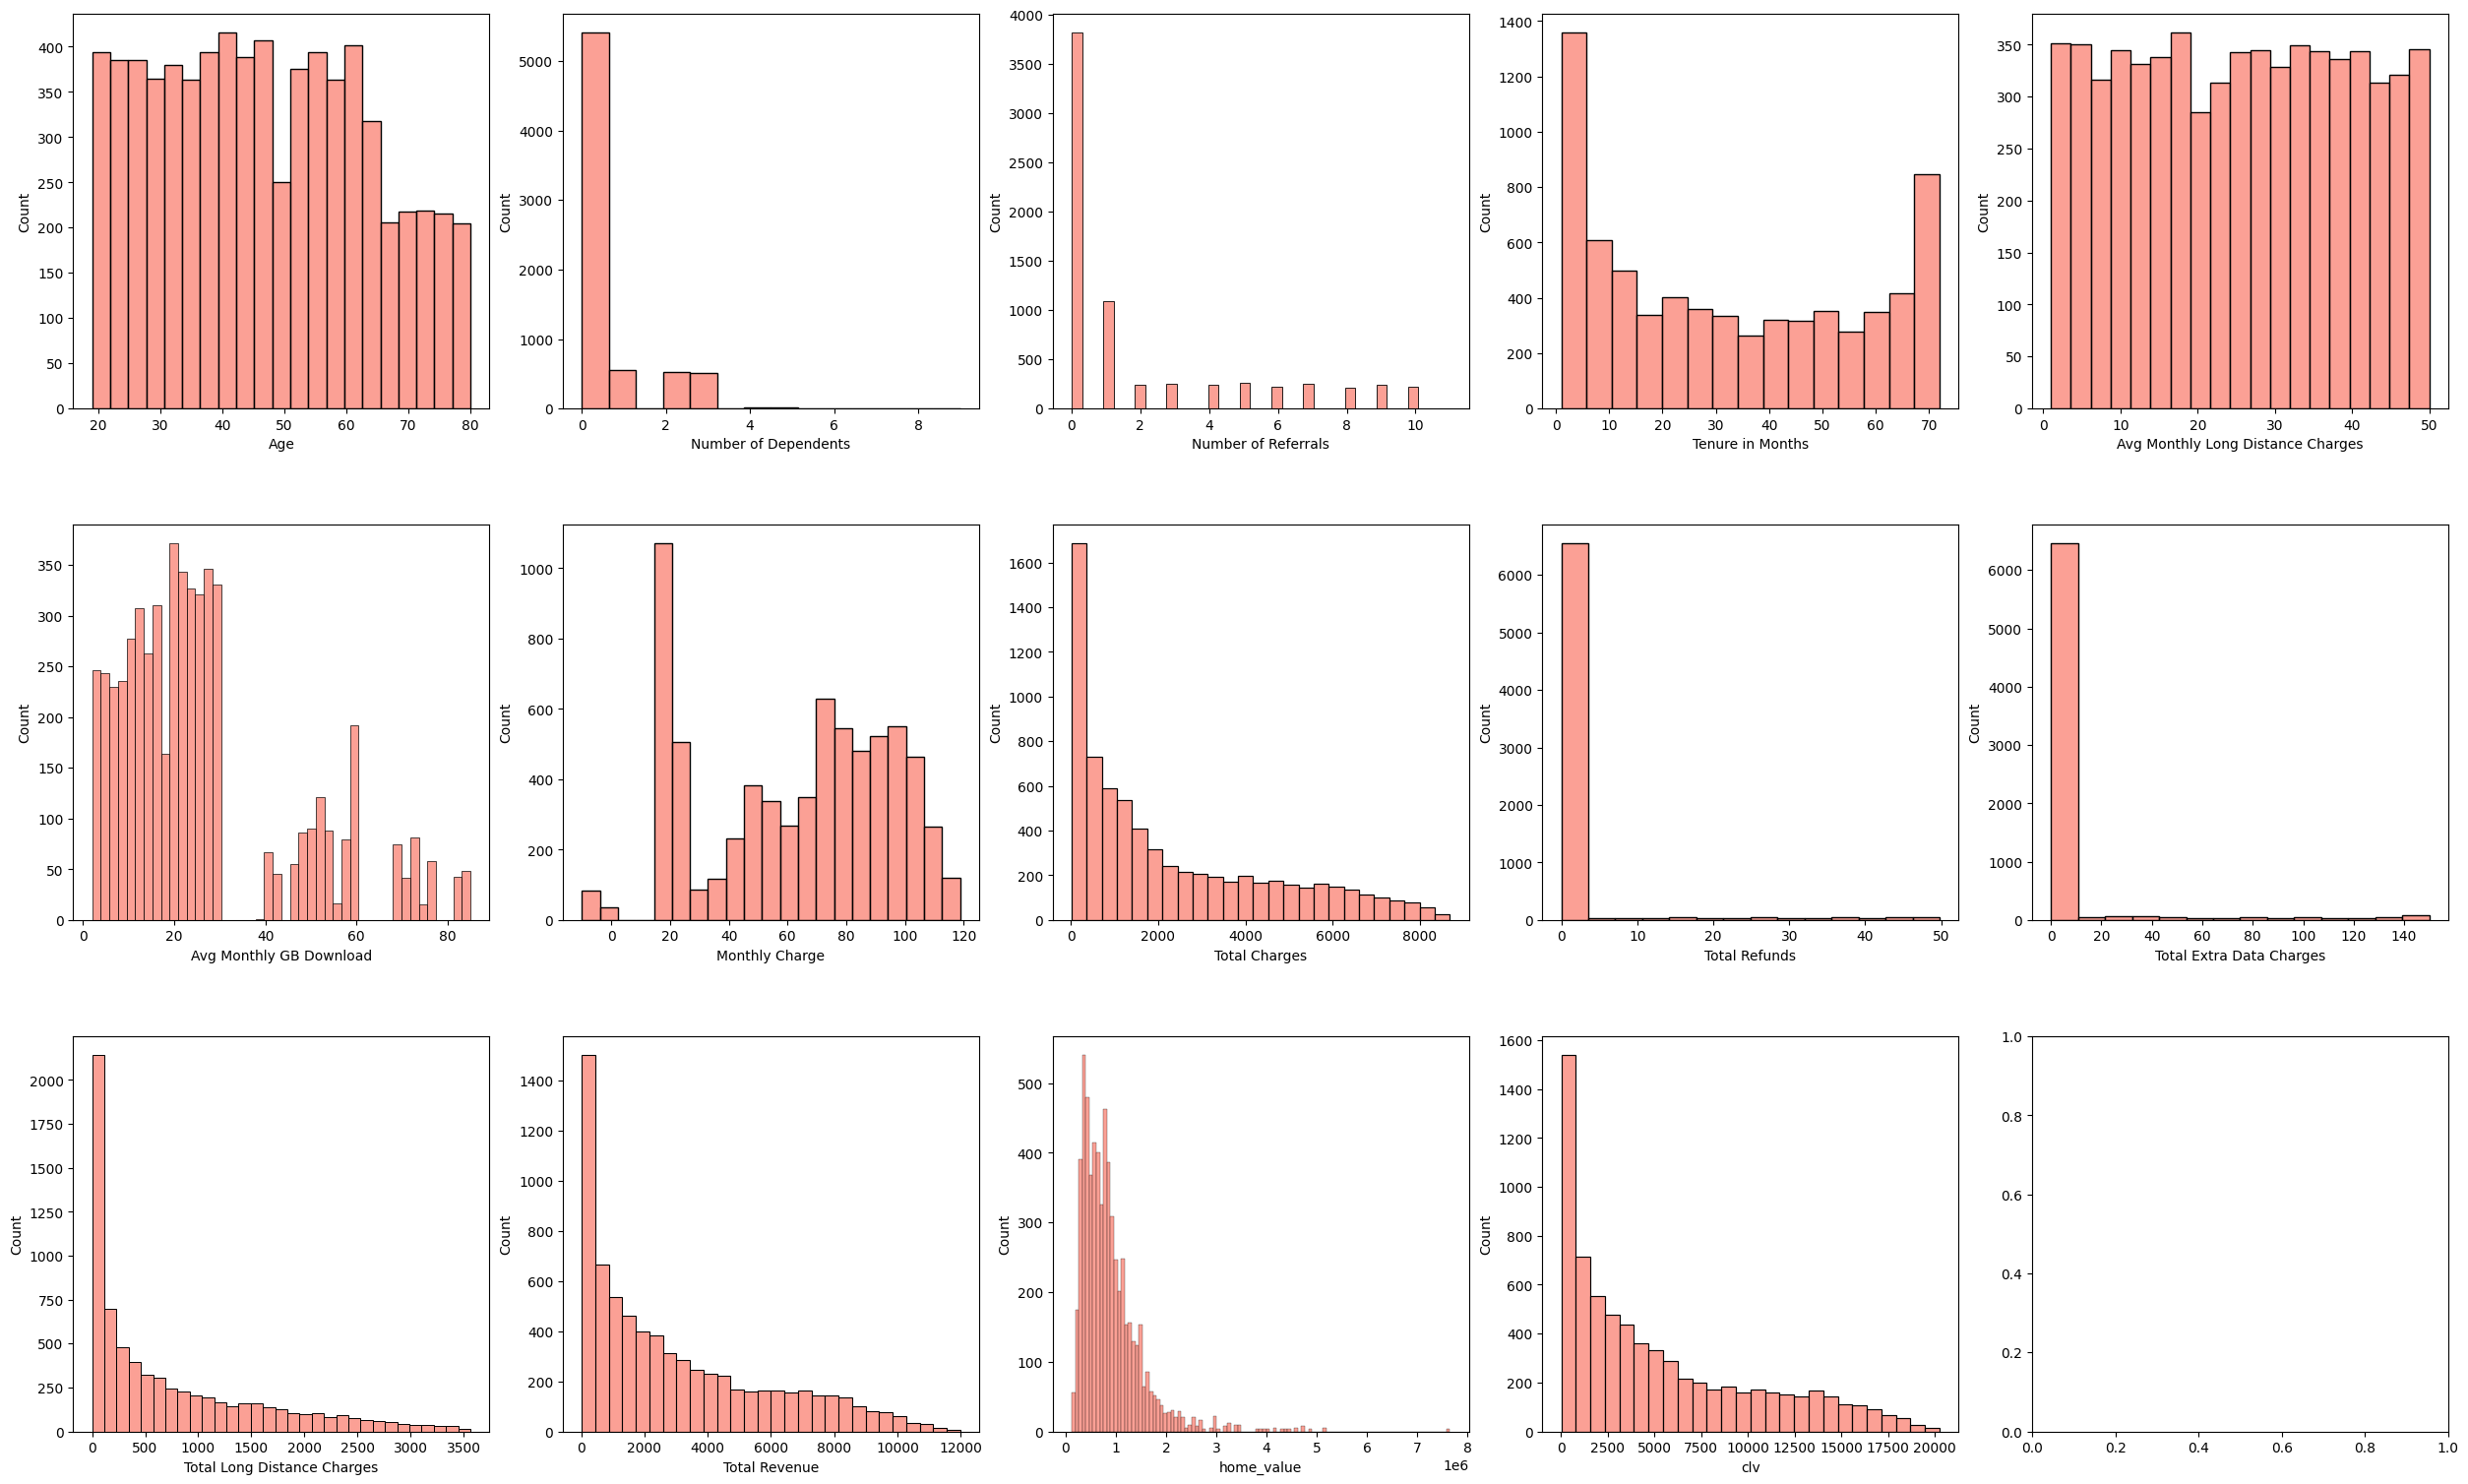

In [22]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(25, 15))
axs = axs.flatten()

for index, (k, v) in enumerate(dataset.select_dtypes(include=['number']).items()):
    sns.histplot(v, ax=axs[index],color = 'salmon')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

The Highest Correlation among Features:


Age                                      Avg Monthly GB Download
Number of Dependents                     Avg Monthly GB Download
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                                clv
Total Refunds                                   Tenure in Months
Total Extra Data Charges                                     clv
Total Long Distance Charges                        Total Revenue
Total Revenue                                                clv
home_value                                   Number of Referrals
clv                                                Total Revenue
dtype: object

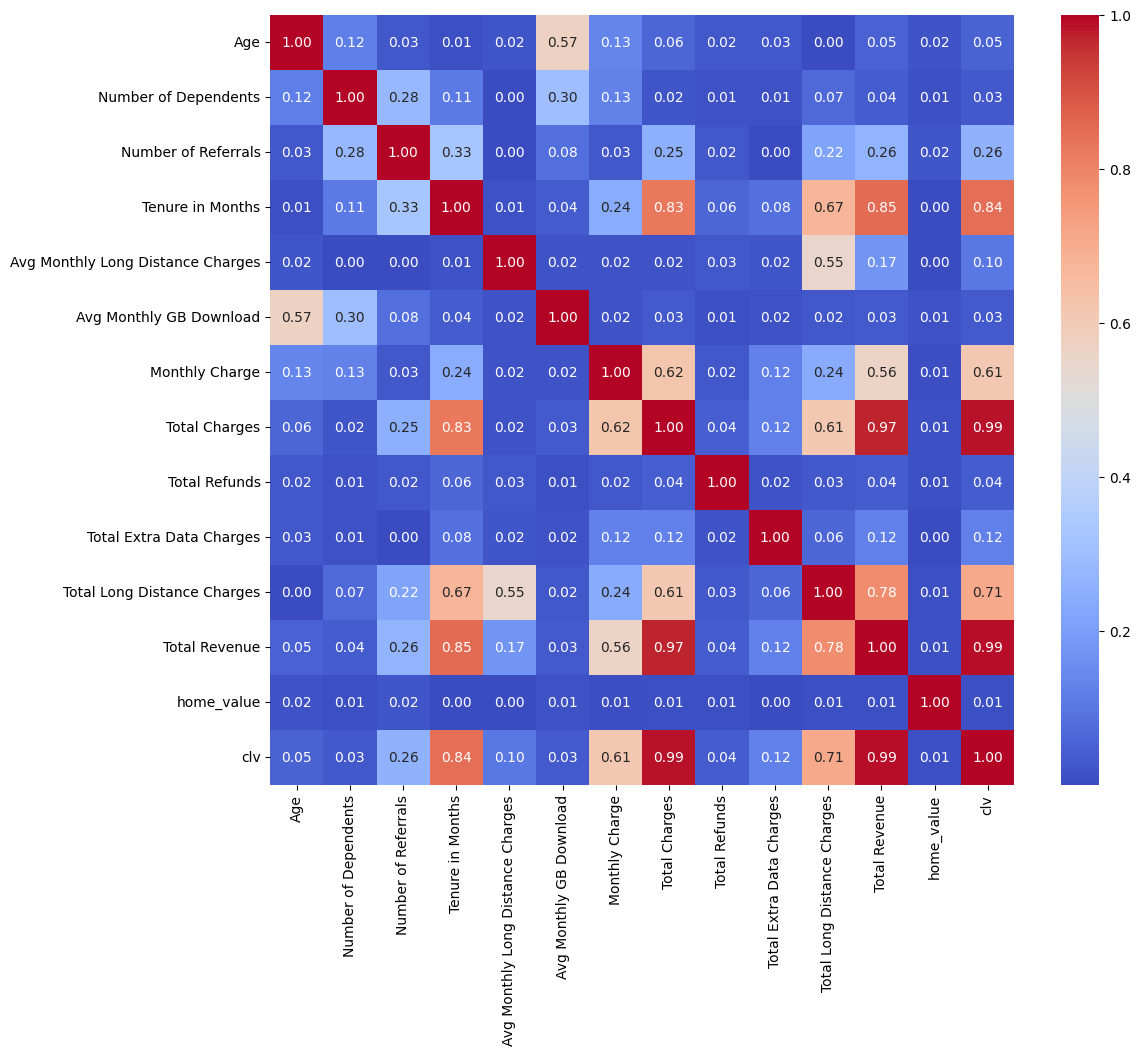

In [23]:
corr_mat = dataset.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat.abs(), annot=True, cmap='coolwarm', fmt=".2f")

print('The Highest Correlation among Features:')
np.fill_diagonal(corr_mat.values, 0)
corr_mat.abs().idxmax()


In [24]:
dataset = dataset.drop(['Total Charges','Total Revenue'],axis=1)

In [25]:
data_skewed = dataset.select_dtypes(include=['number'])

# Calculate skewness of numerical features
skewness = data_skewed.apply(skew)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Age                                  0.162152
Number of Dependents                 2.109483
Number of Referrals                  1.445752
Tenure in Months                     0.240491
Avg Monthly Long Distance Charges         NaN
Avg Monthly GB Download                   NaN
Monthly Charge                      -0.275335
Total Refunds                        4.327595
Total Extra Data Charges             4.090338
Total Long Distance Charges          1.238018
home_value                                NaN
clv                                  0.940256
dtype: float64


In [26]:
skewed_features = ['Number of Dependents','Number of Referrals','Total Refunds','Total Extra Data Charges','Total Long Distance Charges']
pt = PowerTransformer(method='yeo-johnson')
dataset[skewed_features] = pt.fit_transform(dataset[skewed_features])

In [27]:
data_skewed = dataset.select_dtypes(include=['number'])

# Calculate skewness of numerical features
skewness = data_skewed.apply(skew)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Age                                  0.162152
Number of Dependents                 1.281533
Number of Referrals                  0.451679
Tenure in Months                     0.240491
Avg Monthly Long Distance Charges         NaN
Avg Monthly GB Download                   NaN
Monthly Charge                      -0.275335
Total Refunds                        3.239811
Total Extra Data Charges             2.605717
Total Long Distance Charges         -0.218342
home_value                                NaN
clv                                  0.940256
dtype: float64


In [28]:
print("Null values in numerical features:\n",dataset.select_dtypes(include=['number']).isna().sum())

Null values in numerical features:
 Age                                     0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges     682
Avg Monthly GB Download              1526
Monthly Charge                          0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
home_value                            637
clv                                     0
dtype: int64


In [29]:
column_name = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for column in column_name:
  dataset[column] = dataset[column].apply(lambda x: 0 if pd.isnull(x) else x)

In [30]:
dataset['home_value'].fillna(dataset['home_value'].median(), inplace=True)


C:\Users\mirot\AppData\Local\Temp\ipykernel_12700\4185688322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['home_value'].fillna(dataset['home_value'].median(), inplace=True)


In [31]:
print("Null values in numerical features:\n",dataset.select_dtypes(include=['number']).isna().sum())

Null values in numerical features:
 Age                                  0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
home_value                           0
clv                                  0
dtype: int64


## Nominal Features

In [32]:
dataset.describe(include=['object']).T

,count,unique,top,freq
Gender,7043,2,Male,3555
Married,7043,2,No,3641
Offer,3166,5,Offer B,824
Phone Service,7043,2,Yes,6361
Multiple Lines,6361,2,No,3390
Internet Service,7043,2,Yes,5517
Internet Type,5517,3,Fiber Optic,3035
Online Security,5517,2,No,3498
Online Backup,5517,2,No,3088
Device Protection Plan,5517,2,No,3095


In [33]:
mean_price = dataset['home_value'].mean()
std_price = dataset['home_value'].std()

def categorize_price(price, mean, std):
    if price < mean - std:
        return 'low'
    elif price > mean + std:
        return 'high'
    else:
        return 'medium'

dataset['price_category'] = dataset['home_value'].apply(lambda x: categorize_price(x, mean_price, std_price))



In [34]:
dataset = dataset.drop(['home_value'],axis = 1)

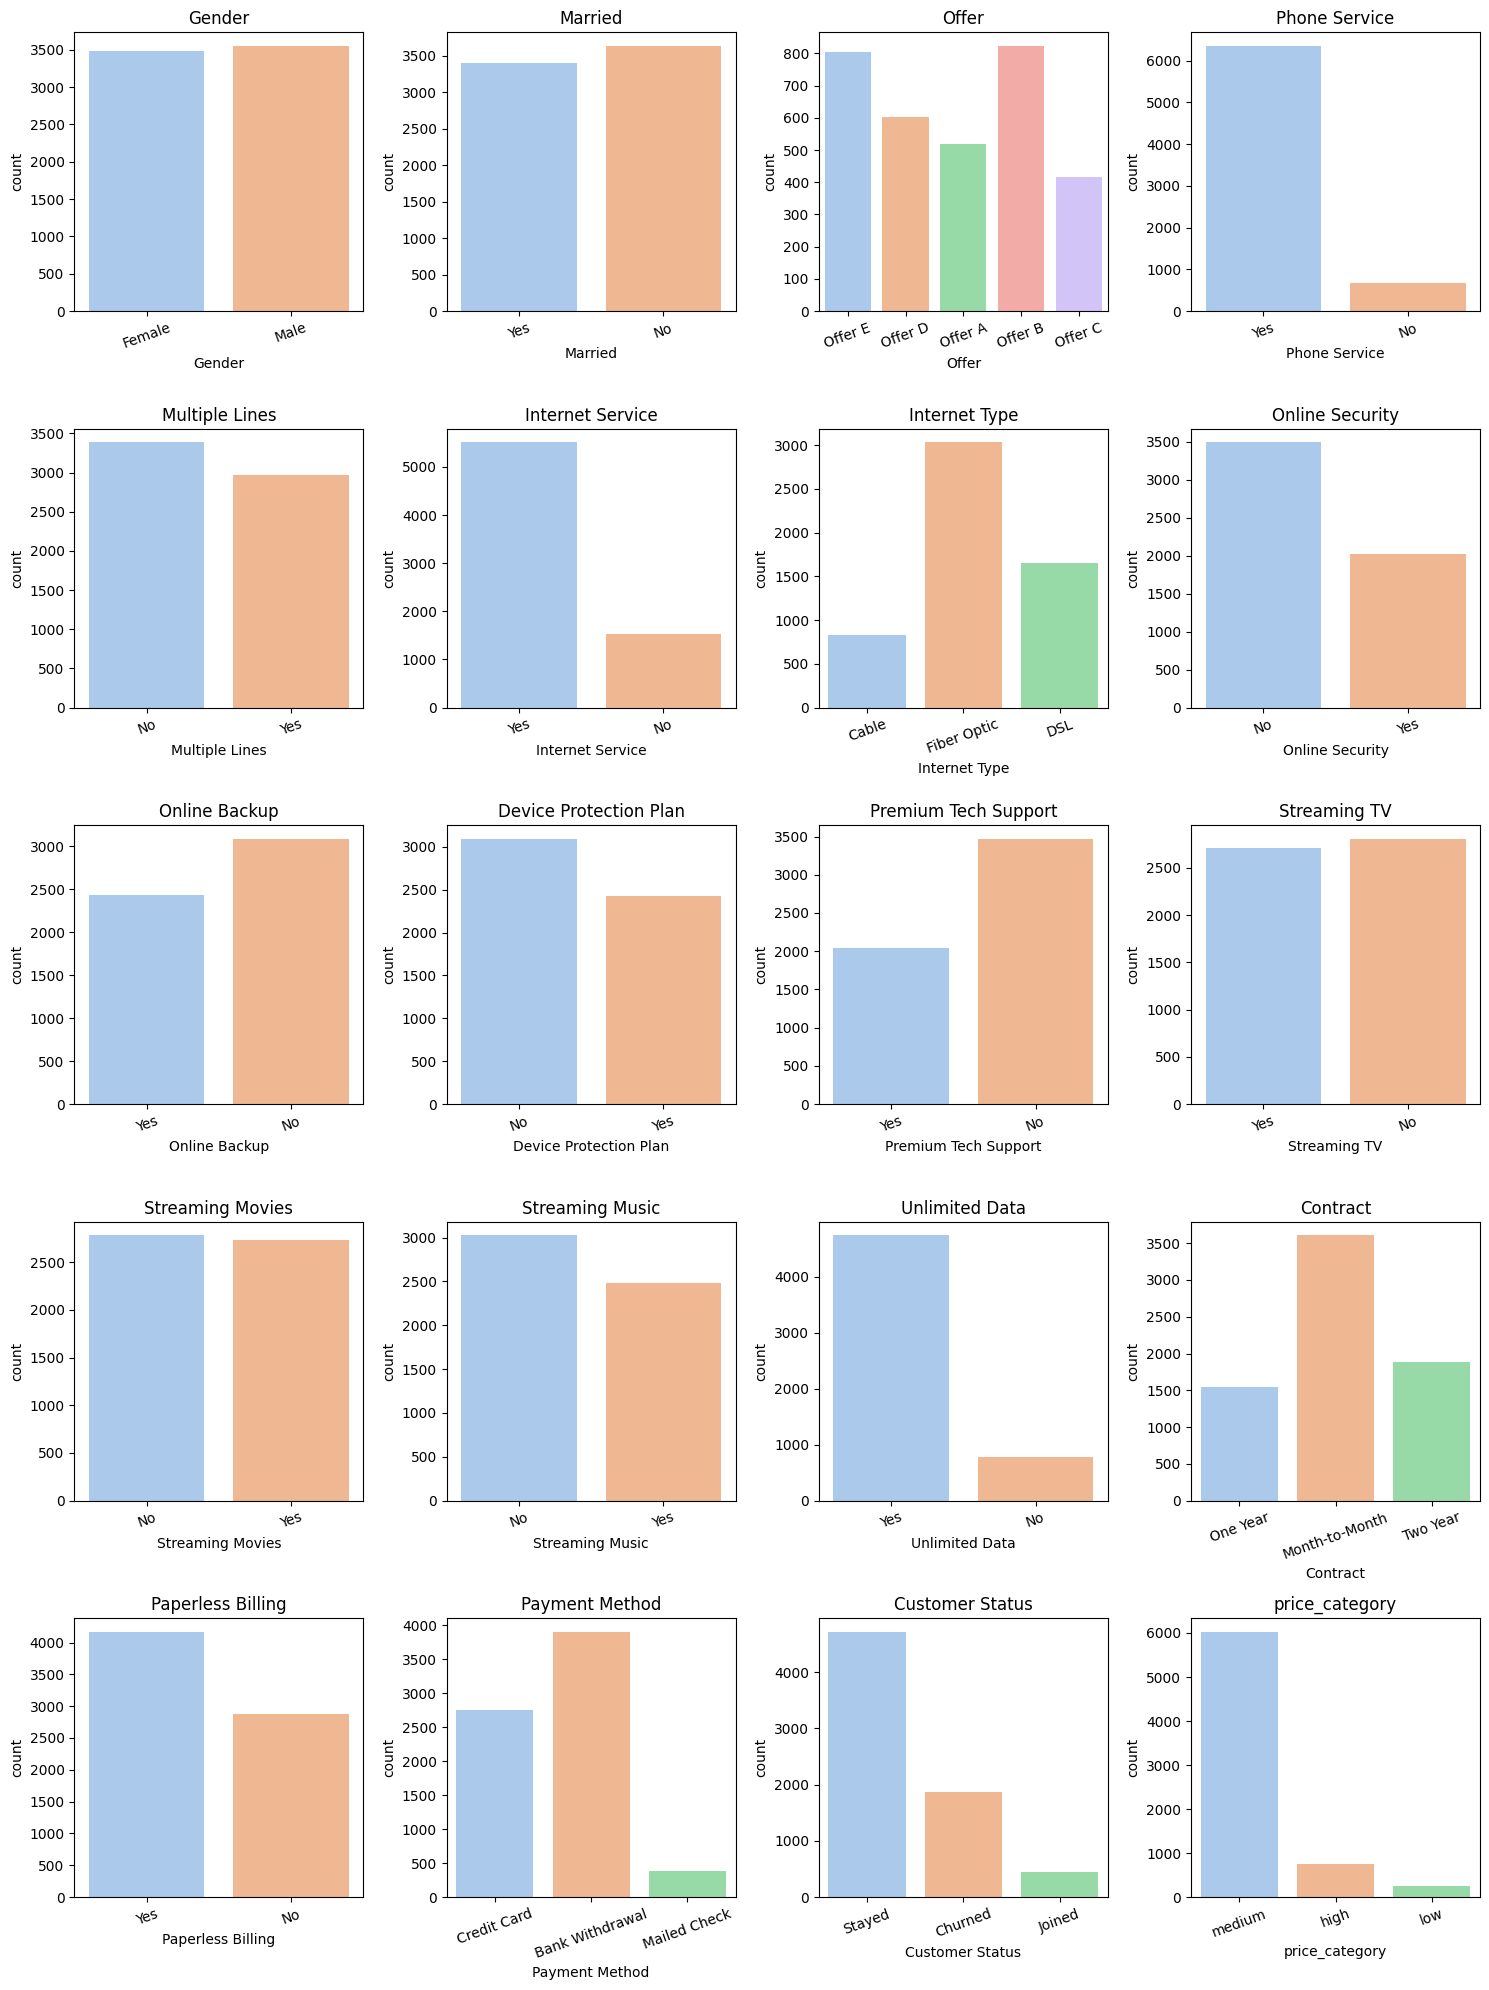

In [35]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(5, 4, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(dataset.select_dtypes(include=['object']).columns):
    sns.countplot(x=col, data=dataset, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()


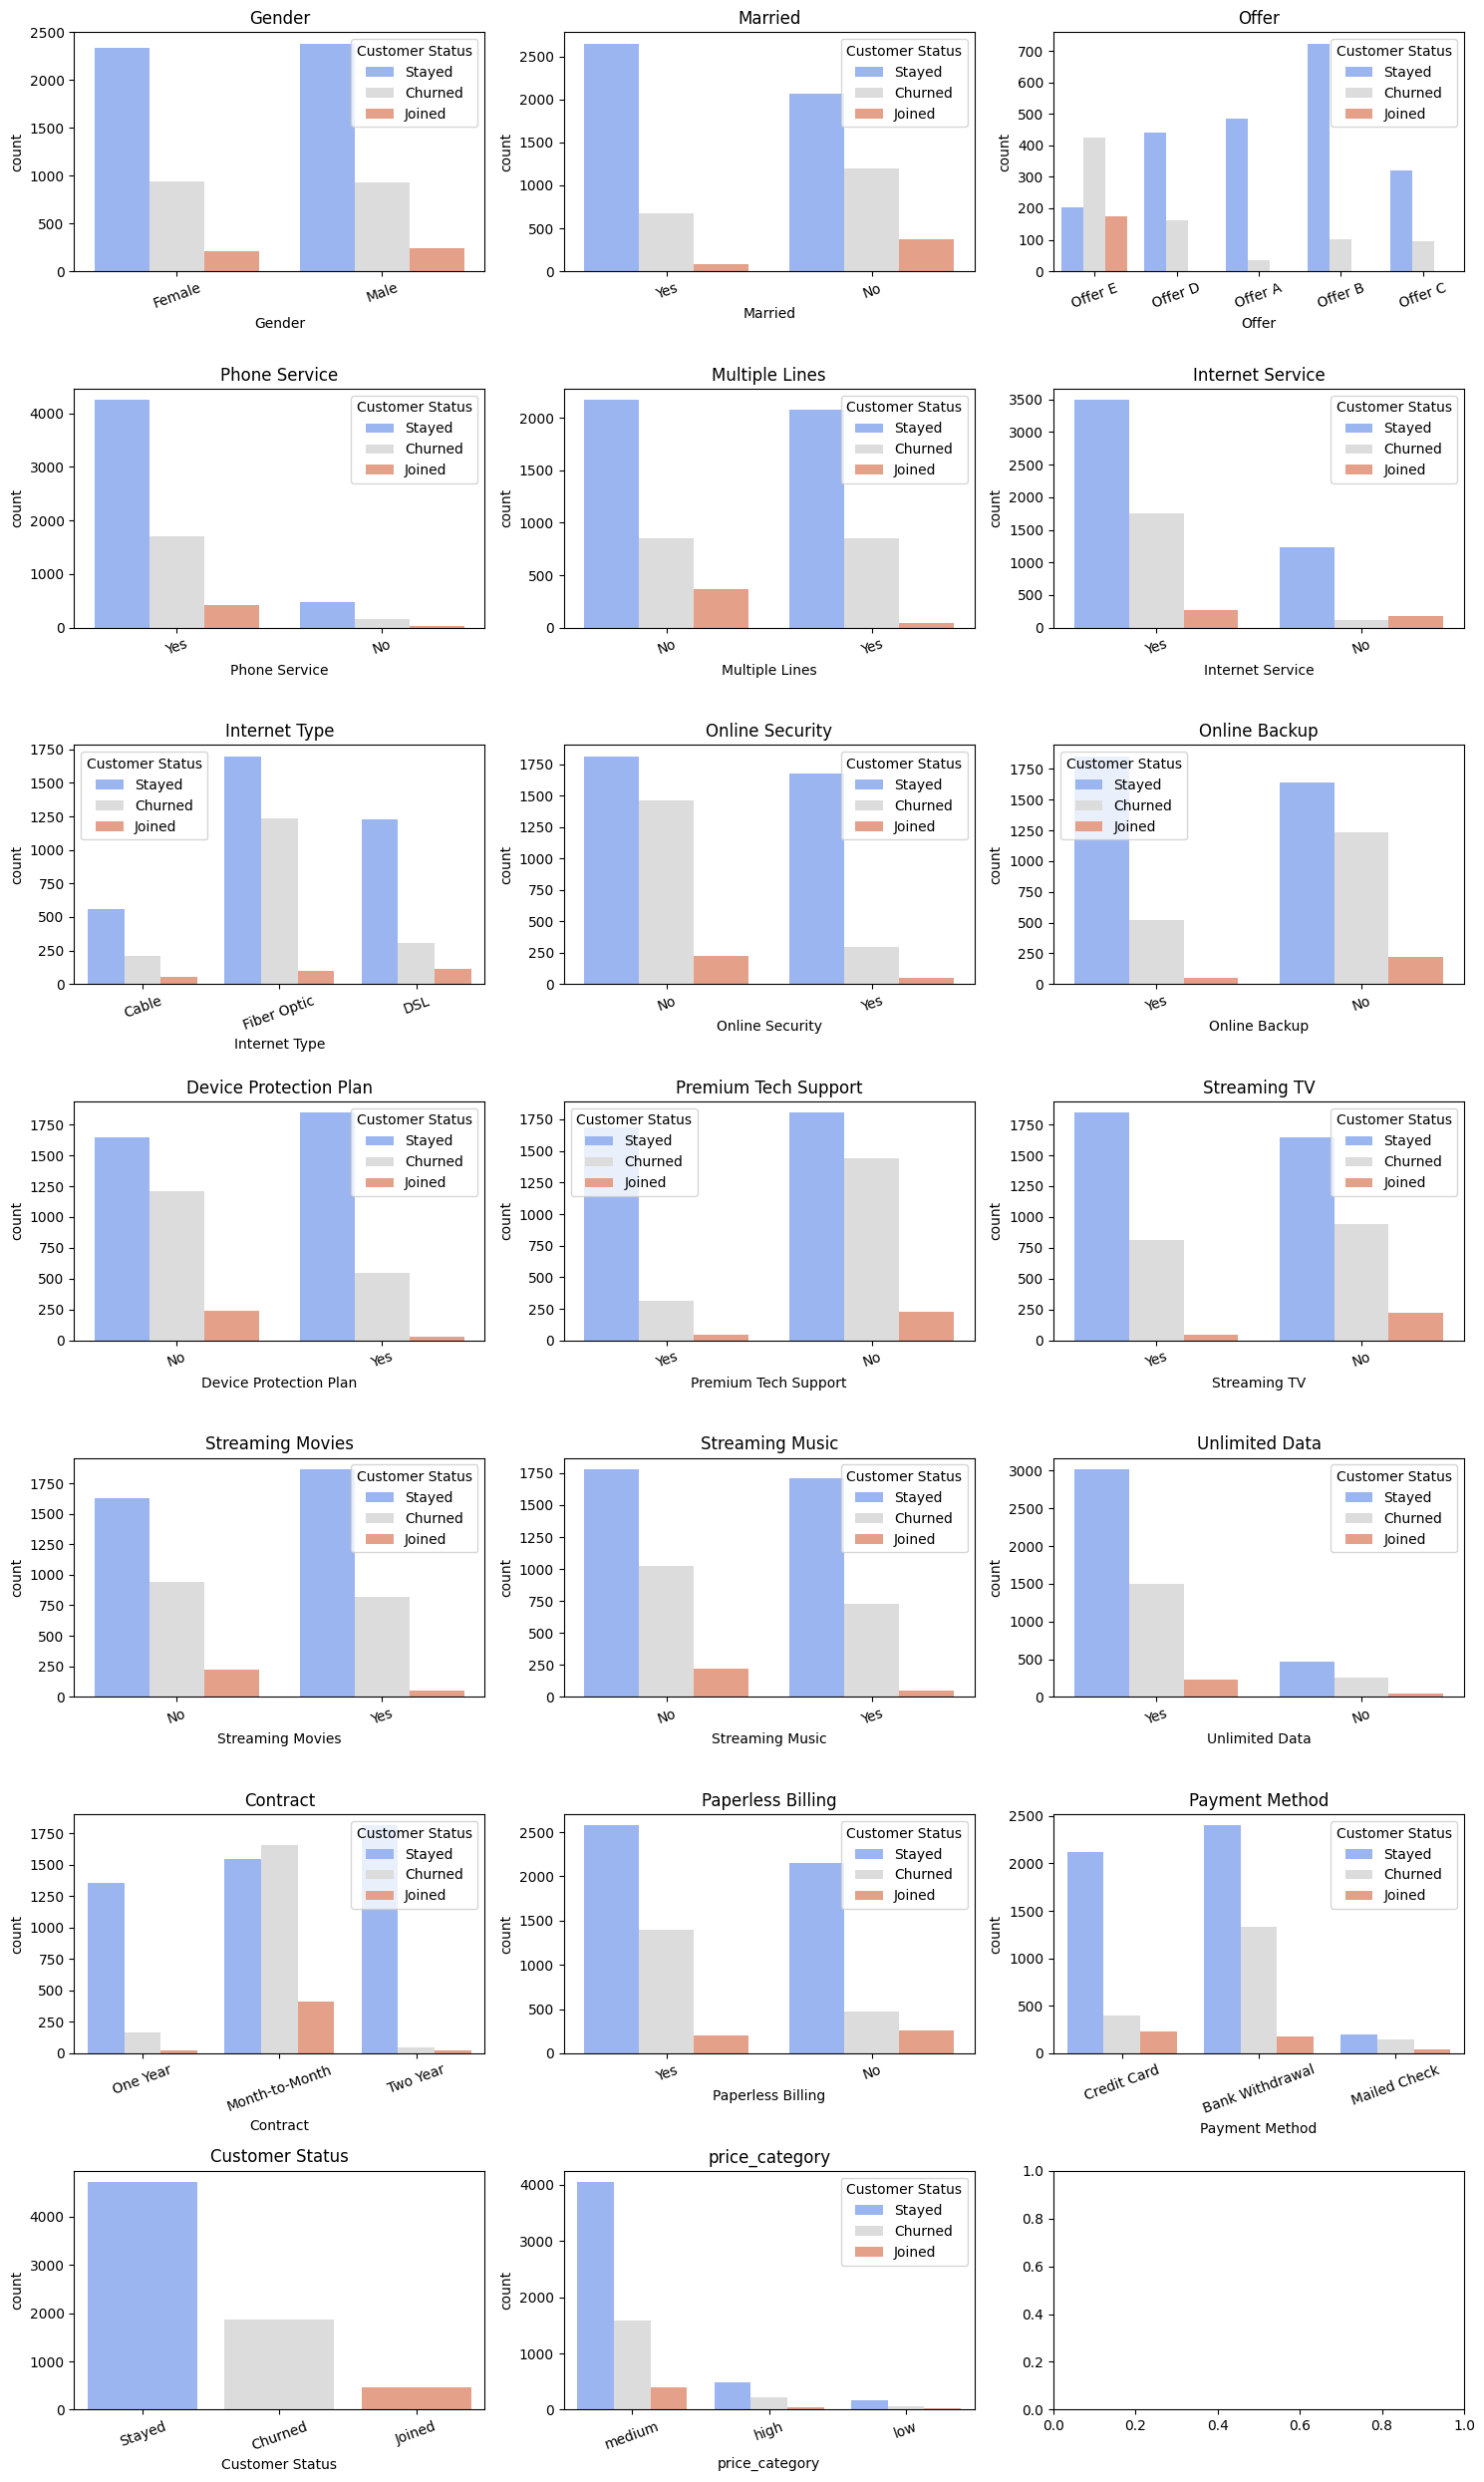

In [36]:
fig, axes = plt.subplots(7, 3, figsize=(15, 25))
axes = axes.flatten()

for i, col in enumerate(dataset.select_dtypes(include=['object']).columns):
    sns.countplot(x=col, data=dataset, hue='Customer Status', ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()

In [37]:
print(f"Null values in nominal features:\n{dataset.select_dtypes(include=['object']).isna().sum()}")

Null values in nominal features:
Gender                       0
Married                      0
Offer                     3877
Phone Service                0
Multiple Lines             682
Internet Service             0
Internet Type             1526
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Streaming Music           1526
Unlimited Data            1526
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
price_category               0
dtype: int64


In [38]:
dataset['Offer'] = dataset['Offer'].apply(lambda x: 'no_offer' if pd.isnull(x) else x)

column_name = ['Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV',
               'Streaming Movies','Streaming Music','Unlimited Data']
for column in column_name:
  dataset[column] = dataset[column].apply(lambda x: 'no_internet' if pd.isnull(x) else x)

In [39]:
dataset['Multiple Lines'].fillna('No', inplace=True)

In [40]:
print(f"Null values in nominal features:\n{dataset.select_dtypes(include=['object']).isna().sum()}")

Null values in nominal features:
Gender                    0
Married                   0
Offer                     0
Phone Service             0
Multiple Lines            0
Internet Service          0
Internet Type             0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Contract                  0
Paperless Billing         0
Payment Method            0
Customer Status           0
price_category            0
dtype: int64


In [41]:
dataset.select_dtypes(include='object').nunique()

Gender                    2
Married                   2
Offer                     6
Phone Service             2
Multiple Lines            2
Internet Service          2
Internet Type             4
Online Security           3
Online Backup             3
Device Protection Plan    3
Premium Tech Support      3
Streaming TV              3
Streaming Movies          3
Streaming Music           3
Unlimited Data            3
Contract                  3
Paperless Billing         2
Payment Method            3
Customer Status           3
price_category            3
dtype: int64

In [42]:
binary_columns = ['Gender', 'Married', 'Phone Service','Multiple Lines','Internet Service','Paperless Billing']
dataset[binary_columns] = dataset[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

In [44]:
label_encoder = LabelEncoder()
dataset['Customer Status'] = label_encoder.fit_transform(dataset['Customer Status'])

In [45]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [75]:
dataset.to_csv('./Data/preprocessed_dataset.csv',index = False)